In [149]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [150]:
ticker = 'AVAX-USD'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

In [151]:
log_returns= np.log(1 + data.pct_change())

In [152]:
log_returns.tail()

,AVAX-USD
Date,
2021-02-08,0.223684
2021-02-09,0.042789
2021-02-10,0.559623
2021-02-11,-0.154750
2021-02-12,0.010296


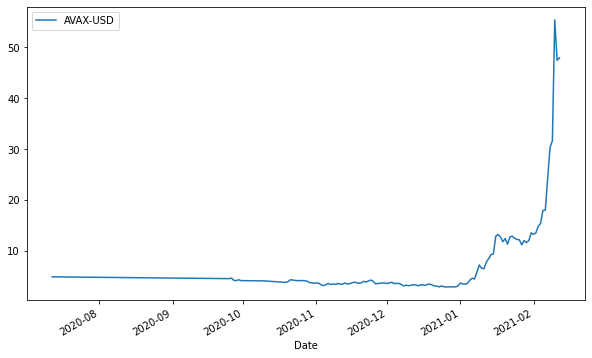

In [153]:
data.plot(figsize=(10,6));

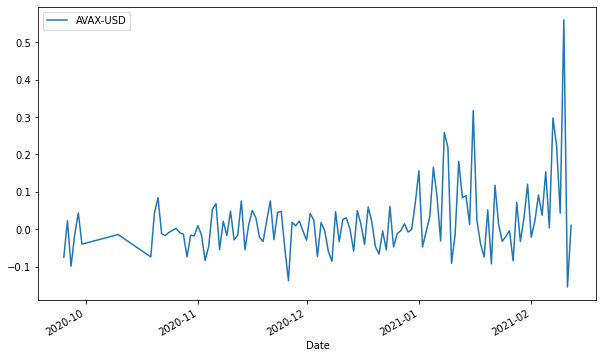

In [154]:
log_returns.plot(figsize=(10,6))
plt.show()

In [155]:
u = log_returns.mean()
u

AVAX-USD    0.018535
dtype: float64

In [156]:
var = log_returns.var()
var

AVAX-USD    0.008516
dtype: float64

In [157]:
drift = u- (0.5 * var)
drift

AVAX-USD    0.014277
dtype: float64

In [158]:
stdev = log_returns.std()
stdev

AVAX-USD    0.092281
dtype: float64

2.nd part

In [159]:
type(drift)

pandas.core.series.Series

In [160]:
type(stdev)

pandas.core.series.Series

In [161]:
np.array(drift)

array([0.01427715])

In [162]:
drift.values

array([0.01427715])

In [163]:
stdev.values

array([0.09228121])

In [164]:
norm.ppf(0.95)

1.6448536269514722

In [165]:
x = np.random.rand(10,2)
x

array([[0.72521632, 0.0359676 ],
       [0.49151405, 0.40032939],
       [0.36648893, 0.59003325],
       [0.51601612, 0.08669778],
       [0.90847858, 0.04225652],
       [0.16585785, 0.29980425],
       [0.55774265, 0.21213045],
       [0.32085224, 0.83850135],
       [0.42825722, 0.80448587],
       [0.67745115, 0.66647927]])

In [166]:
norm.ppf(x)

array([[ 0.59840855, -1.79952794],
       [-0.02127272, -0.2524946 ],
       [-0.34116702,  0.2276305 ],
       [ 0.04015724, -1.3613739 ],
       [ 1.33144438, -1.72508004],
       [-0.97066385, -0.52496359],
       [ 0.14524846, -0.79905089],
       [-0.46531697,  0.98831727],
       [-0.1808129 ,  0.85775408],
       [ 0.46058317,  0.43021197]])

In [167]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 1.10168443, -0.52933929],
       [-0.39557884,  0.14047912],
       [-0.40588123,  0.00810568],
       [ 0.91409293, -0.06005346],
       [-0.90154803, -0.10378493],
       [ 0.60360242, -0.78561306],
       [ 0.28833825, -1.33408019],
       [ 0.17415005, -0.85533747],
       [-0.70950846,  1.48893655],
       [ 0.61051255, -0.24882713]])

In [168]:
t_intervals = 365
iterations = 100

In [169]:
daily_returns = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals, iterations)))

In [170]:
daily_returns

array([[0.95731282, 0.96710682, 1.0522889 , ..., 1.15950792, 1.1115374 ,
        1.03847217],
       [0.95491982, 1.00677103, 0.99449979, ..., 0.99481726, 1.02063143,
        1.16209412],
       [0.92578006, 0.98644983, 1.07066758, ..., 0.9724901 , 1.04380427,
        1.0313975 ],
       ...,
       [0.94552048, 0.99216313, 1.02649187, ..., 1.04363117, 0.88934386,
        0.97948295],
       [1.00066757, 1.06087461, 1.08576876, ..., 0.80809834, 0.9570756 ,
        1.01241004],
       [1.13653178, 1.07232099, 0.94901918, ..., 1.04661249, 0.87190405,
        0.94814081]])

3rd part


In [171]:
S0 = data.iloc[-1]
S0

AVAX-USD    47.860546
Name: 2021-02-12 00:00:00, dtype: float64

In [172]:
price_list = np.zeros_like(daily_returns)

In [173]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [174]:
price_list[0] = S0
price_list

array([[47.86054611, 47.86054611, 47.86054611, ..., 47.86054611,
        47.86054611, 47.86054611],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [175]:
for t in range(1, t_intervals):
  price_list[t] = price_list[t-1] * daily_returns[t]

In [176]:
price_list

array([[4.78605461e+01, 4.78605461e+01, 4.78605461e+01, ...,
        4.78605461e+01, 4.78605461e+01, 4.78605461e+01],
       [4.57029840e+01, 4.81846112e+01, 4.75973029e+01, ...,
        4.76124974e+01, 4.88479774e+01, 5.56184591e+01],
       [4.23109112e+01, 4.75317014e+01, 5.09608892e+01, ...,
        4.63026822e+01, 5.09877274e+01, 5.73647398e+01],
       ...,
       [3.34400796e+03, 2.97123359e+04, 1.43344208e+05, ...,
        2.87084179e+04, 1.21684125e+05, 8.73770813e+04],
       [3.34624032e+03, 3.15210628e+04, 1.55638663e+05, ...,
        2.31992249e+04, 1.16460907e+05, 8.84614341e+04],
       [3.80310848e+03, 3.38006971e+04, 1.47704077e+05, ...,
        2.42805985e+04, 1.01542737e+05, 8.38738962e+04]])

In [177]:
# gün - o gün için her bir 100 çizginin tahmini
len(price_list[0])

100

In [178]:
price_list[0]

array([47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86054611,
       47.86054611, 47.86054611, 47.86054611, 47.86054611, 47.86

In [179]:
#Her gün için her çizginin tahminini toplayıp 100'e yani çizgi sayısına bölmek
for i in range(0,t_intervals-1):
  sum = 0
  for j in range(0,iterations-1):
    sum += price_list[i][j]
  
  average = sum / iterations
  print(f"{i+1}. day prediction : {average} ")

  


1. day prediction : 47.38194065093994 
2. day prediction : 48.046228246517124 
3. day prediction : 48.98118636687264 
4. day prediction : 50.205217995904974 
5. day prediction : 51.11694952694228 
6. day prediction : 51.64838416516307 
7. day prediction : 53.3244955191297 
8. day prediction : 54.47608672597591 
9. day prediction : 56.55593378858482 
10. day prediction : 57.64142012776671 
11. day prediction : 58.3391884339472 
12. day prediction : 59.0436504110945 
13. day prediction : 60.42453106813404 
14. day prediction : 61.381158815065994 
15. day prediction : 62.31136364065005 
16. day prediction : 63.68722570001128 
17. day prediction : 63.91681962924645 
18. day prediction : 65.60326159047696 
19. day prediction : 67.09032323081856 
20. day prediction : 68.30254703794789 
21. day prediction : 70.22255604152646 
22. day prediction : 71.42490379143756 
23. day prediction : 72.18780491142354 
24. day prediction : 72.87868369716577 
25. day prediction : 74.36754694637801 
26. day p

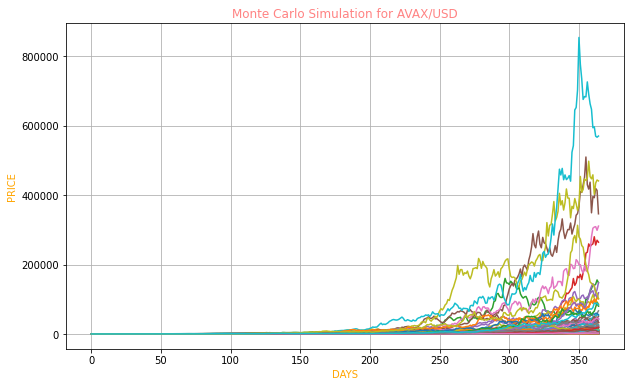

In [180]:
plt.figure(figsize=(10,6))
plt.plot(price_list) 
plt.grid(True)
plt.xlabel('DAYS', color='orange')
plt.ylabel('PRICE', color='orange')
plt.title('Monte Carlo Simulation for AVAX/USD',color='#FF8484')
plt.show()